In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from google_play_scraper import app, Sort, reviews
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#scrape jumlah review yang diinginkan
result, continuation_token = reviews(
    'com.google.android.youtube',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT, # digunakan untuk mendapatkan review yang relevan
    count=10000, # jumlah review yang mau diambil
    filter_score_with=None # digunakan untuk mengambil semua score atau rating bintang 1 sampai 5
)
# def get_reviews(package_id):
#   reviews = reviews_all(
#     package_id,
#     lang='id',
#     country='id',
#     sort=Sort.MOST_RELEVANT,
#     count=1000,
#     filter_score_with= None
#   )

#   # Mengubah hasil review menjadi DataFrame pandas dan mengembalikannya
#   return pd.DataFrame(reviews)

In [17]:
print(result[0])

{'reviewId': '922b194e-08dc-459d-9b66-e7aa764b741f', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'Tolong buat admin YouTube iklannya ditambahkan lagi menjadi 4 iklan dalam 1 video dan durasinya menjadi 30 detik, Sudah seperti story anying. menghabiskan kuota dengan sangat cepat lagi, setiap memutar satu video ada saja iklannya. Tolong buat sistem YouTube iklannya untuk dikurangi lagi dan kurangkan pemakaian data kuota. Itu saja terima kasih.', 'score': 1, 'thumbsUpCount': 1, 'reviewCreatedVersion': '16.49.37', 'at': datetime.datetime(2022, 10, 23, 13, 49, 8), 'replyContent': None, 'repliedAt': None, 'appVersion': '16.49.37'}


In [18]:
data = pd.DataFrame(np.array(result), columns=['review'])

data = data.join(pd.DataFrame(data.pop('review').tolist()))

data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,922b194e-08dc-459d-9b66-e7aa764b741f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong buat admin YouTube iklannya ditambahkan...,1,1,16.49.37,2022-10-23 13:49:08,None,None,16.49.37
1,c01b9291-0a6a-4f1b-add6-968364798965,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Semakin update malah makin rusak, saat layar p...",1,5933,19.44.32,2024-11-07 19:57:20,None,None,19.44.32
2,bc519730-e45d-41a9-8316-736735c9ee20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"YouTube jadi sering error, semenjak update ter...",1,3403,19.44.35,2024-11-08 03:18:04,None,None,19.44.35
3,834328c1-598e-4682-9b1f-37c4abbff7b6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Barusan update lagi, langsung tes. Masih mirip...",1,2799,19.44.37,2024-11-08 15:29:55,None,None,19.44.37
4,dfdcae54-37be-433e-9de3-05f809be8216,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sumpah update-an YouTube sekarang JELEK PARAH,...",1,514,19.44.37,2024-11-08 16:42:49,None,None,19.44.37
...,...,...,...,...,...,...,...,...,...,...,...
9995,1378cf9a-b7cc-40cf-b631-674ef0085933,Alfi Hikmah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Setelah di update dan beralih ke yt premium, s...",1,232,17.11.34,2022-04-05 21:01:20,None,None,17.11.34
9996,1171ee84-c5bb-4e12-b90d-833dd5df353d,Aris Gaming,https://play-lh.googleusercontent.com/a/ACg8oc...,Terus gimana untuk bug komentarnya!!? Saya mau...,1,60,18.14.37,2023-04-09 14:13:56,None,None,18.14.37
9997,6d0887d3-600a-41e4-9f20-f8d4b2b791af,Fadhlin,https://play-lh.googleusercontent.com/a-/ALV-U...,Kini youtube terlalu fokus untuk mengumpulkank...,1,53,16.31.35,2021-08-19 19:56:46,None,None,16.31.35
9998,5aede1b0-7e64-4c6c-b271-ecf43bb8e910,Danu,https://play-lh.googleusercontent.com/a-/ALV-U...,Hallo saya punya keluhan nih kenapa ya notifik...,2,74,15.42.37,2020-10-27 07:29:26,None,None,15.42.37


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               10000 non-null  object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  9940 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            9940 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 859.5+ KB


In [20]:
data.describe()

,score,thumbsUpCount,at
count,10000.000000,10000.000000,10000
mean,2.488400,222.790600,2023-06-22 05:40:40.414400
min,1.000000,0.000000,2018-09-15 16:50:44
25%,1.000000,1.000000,2022-04-24 20:13:01.750000128
50%,2.000000,3.000000,2024-07-04 21:20:45.500000
75%,4.000000,27.000000,2024-09-28 07:32:47.500000
max,5.000000,78238.000000,2024-11-10 17:03:42
std,1.581492,1695.331884,NaN


In [21]:
data['score'].value_counts()

score
1    4358
5    1968
3    1352
2    1329
4     993
Name: count, dtype: int64

In [22]:
#Pengecekan data yang hilang
data.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion       60
at                          0
replyContent            10000
repliedAt               10000
appVersion                 60
dtype: int64

In [23]:
print("\nMengecek baris yang terduplikat:")
print(data.duplicated().sum())


Mengecek baris yang terduplikat:
0


In [54]:
data = data.drop_duplicates()

In [55]:
data.duplicated().sum()

0

### Pre-Processing Data

In [24]:
# Memilih kolom 'content' dan 'score' dari DataFrame reviews
data = data[['content', 'score']]

# Menghapus baris yang memiliki nilai null
data = data.dropna()

# # Menghapus semua karakter non-alfanumerik (kecuali spasi) dari kolom 'content'
# data['clean_content'] = data['content'].str.replace(r'[^\w\s]', '', regex=True)

# # Mengubah semua teks dalam kolom 'clean_content' menjadi huruf kecil
# data['clean_content'] = data['clean_content'].str.lower()

# # Menampilkan kolom 'content', 'clean_content', dan 'score' dari DataFrame review
# data[['content', 'clean_content', 'score']]

Hapus Emoji

In [25]:
import re
import string
import demoji
# Clean emojis from text
def remove_emojis(text):
    return demoji.replace(text, '')

Hapus Tanda Baca, Stopwords, Tautan, Mention

In [26]:
# Define stop words for text cleaning
stop_words = set(stopwords.words('indonesian'))

def strip_all_entities(text):
    text = re.sub(r'\r|\n', ' ', text.lower())  #Ganti baris baru dengan spasi, dan ubah menjadi
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Hapus link dan mention
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Hapus non-ASCII char
    text = re.sub(r'\d+', '', text) # Hapus Angka
    text = re.sub(r'#\S+', '', text) #Hapus Hashtags
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

Filter Special Char ($ dan &) Di Beberapa Kata dan Menghapus Spasi Berulang

In [27]:
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Menghapus spasi yang berulang
def remove_multi_spaces(text):
    return re.sub(r"\s\s+", " ", text)

Menghapus Content selain Bahasa Indonesia

In [28]:
from langdetect import detect, LangDetectException
def filter_non_indonesian(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "id" else ""

Expand Contractions

In [29]:
contractions_dict = {
    "gak": "tidak",
    "nggak": "tidak",
    "ga": "tidak",
    "udah": "sudah",
    "belom": "belum",
    "blm": "belum",
    "kalo": "kalau",
    "kl": "kalau",
    "klo": "kalau",
    "tau": "tahu",
    "tauu": "tahu",
    "tdk": "tidak",
    "bgt": "banget",
    "bngt": "banget",
    "jg": "juga",
    "org": "orang",
    "bbrp": "beberapa",
    "dr": "dari",
    "dgn": "dengan",
    "aja": "saja",
    "kmu": "kamu",
    "km": "kamu",
    "aku": "saya",
    "sy": "saya",
    "gw": "saya",
    "gue": "saya",
    "dlm": "dalam",
    "spt": "seperti",
    "nih": "ini",
    "tuh": "itu",
    "gt": "gitu",
    "gitu": "begitu",
    "bnyk": "banyak",
    "gmn": "gimana",
    "gmnsi": "gimana sih",
    "biar": "supaya",
    "mo": "mau",
    "mauu": "mau",
    "bkn": "bukan",
    "trs": "terus",
    "tp": "tapi",
    "jgn": "jangan",
    "pdhl": "padahal",
    "klian": "kalian",
    "mrk": "mereka",
    "trs": "terus",
    "prnh": "pernah",
    "skrg": "sekarang",
    "mslh": "masalah",
    "dmn": "dimana",
    "knp": "kenapa",
    "krn": "karena",
    "aj": "saja",
    "bs": "bisa",
    "dpt": "dapat",
    "ngapain": "untuk apa",
    "ntar": "nanti",
    "smg": "semoga",
    "dl": "dulu",
    "sblm": "sebelum",
    "stlh": "setelah",
    "sm": "sama",
    "lg": "lagi",
    "ato": "atau",
    "udh": "sudah",
    "nyari": "mencari",
    "cariin": "mencarikan",
    "mainin": "memainkan",
    "dibalikin": "dikembalikan",
    "apk": "aplikasi",
    "apl" : "aplikasi",

    # Tambahan kontraksi untuk konteks aplikasi streaming
    "yt": "youtube",
    "ytb": "youtube",
    "vid": "video",
    "playlist": "daftar putar",
    "subs": "langganan",
    "subscriber": "pelanggan",
    "channel": "saluran",
    "comment": "komentar",
    "cmnt": "komentar",
    "views": "tontonan",
    "like": "suka",
    "dislike": "tidak suka",
    "replay": "putar ulang",
    "stream": "siaran langsung",
    "live": "langsung",
    "upload": "unggah",
    "streaming": "menyiarkan",
    "clickbait": "umpan klik",
    "vlog": "video blog",
    "reaction": "reaksi",
    "unboxing": "pembukaan kemasan",
    "share": "membagikan",
    "watch": "menonton",
    "watchlater": "tonton nanti",
    "trending": "sedang populer",
    "viral": "tersebar luas",
    "shorts": "video pendek",
    "ads": "iklan",
    "promo": "promosi",
    "influencer": "pemberi pengaruh",
    "content": "konten",
    "viewers": "penonton",
    "liked": "disukai",
    "recommend": "rekomendasi",
    "recommendation": "rekomendasi",
     
}

# Fungsi untuk mengembangkan kontraksi
def expand_contractions(text):
    # Regex untuk menemukan kata yang ada di contractions_dict
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in contractions_dict.keys()) + r')\b')
    # Fungsi untuk mengganti kata yang ditemukan dengan bentuk lengkapnya
    expanded_text = pattern.sub(lambda x: contractions_dict[x.group()], text)
    return expanded_text

Lemmatize Words

Keuntungan di bandingkan stemming

Menghasilkan kata-kata yang valid.

Lebih akurat karena mempertimbangkan konteks dan analisis morfologi.

In [30]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
# Inisialisasi lemmatizer untuk text cleaning
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [31]:
# menghapus kata-kata pendek
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Mengubah kata ke bentuk dasarnya
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Hapus tanda baca yang berulang
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Menghapus spasi tambahan
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Menhapus spasi di awal dan diakhir tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Menghapus tweet pendek/singkat
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

Menampilkan Hasil Preprocessing

In [32]:
def clean_tweet(tweet):
    tweet = remove_emojis(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_indonesian(tweet)
    tweet = strip_all_entities(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_multi_spaces(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Menghapus spasi tambahan diantara kata
    return tweet

In [33]:
%%time
# membersihkan teks pada kolom 'content' dalam dataframe dengan menggunakan fungsi clean_tweet.
data['clean_content'] = [clean_tweet(tweet) for tweet in data['content']]

CPU times: total: 49 s
Wall time: 50.1 s


In [34]:
data

,content,score,clean_content
0,Tolong buat admin YouTube iklannya ditambahkan...,1,tolong admin youtube iklannya iklan video dura...
1,"Semakin update malah makin rusak, saat layar p...",1,update rusak layar posisi landscape mengubah p...
2,"YouTube jadi sering error, semenjak update ter...",1,youtube error semenjak update terbaru contoh b...
3,"Barusan update lagi, langsung tes. Masih mirip...",1,barusan update langsung te bug terburuk update...
4,"sumpah update-an YouTube sekarang JELEK PARAH,...",1,sumpah updatean youtube jelek parah video ngam...
...,...,...,...
9995,"Setelah di update dan beralih ke yt premium, s...",1,update beralih youtube premium subtitle beruba...
9996,Terus gimana untuk bug komentarnya!!? Saya mau...,1,gimana bug komentarnya scroll komentarnya gk t...
9997,Kini youtube terlalu fokus untuk mengumpulkank...,1,youtube fokus mengumpulkankan uang lupa penggu...
9998,Hallo saya punya keluhan nih kenapa ya notifik...,2,hallo keluhan ya notifikasi youtube muncul sal...


In [5]:
# Menambahkan kolom sentimen dengan kriteria,
# score 1-2 --> negatif dengan kode 0,
# score 3 adalah netral dengan kode 1,
# score 4 -5 adalah positif dengan kode 2
sentimen = []
for index, row in data.iterrows():
    if row['score'] > 3 :
        sentimen.append('positif')
    # elif row['score'] == 3 :
    #     sentimen.append('netral')
    else:
        sentimen.append('negatif')
data['sentiment'] = sentimen

# Menampilkan kolom 'clean_content' (isi review asli) dan 'sentiment' (label sentimen) dari DataFrame review
data[['clean_content', 'score','sentiment']]

,clean_content,score,sentiment
0,tolong admin youtube iklannya iklan video dura...,1,negatif
1,update rusak layar posisi landscape mengubah p...,1,negatif
2,youtube error semenjak update terbaru contoh b...,1,negatif
3,barusan update langsung te bug terburuk update...,1,negatif
4,sumpah updatean youtube jelek parah video ngam...,1,negatif
...,...,...,...
9995,update beralih youtube premium subtitle beruba...,1,negatif
9996,gimana bug komentarnya scroll komentarnya gk t...,1,negatif
9997,youtube fokus mengumpulkankan uang lupa penggu...,1,negatif
9998,hallo keluhan ya notifikasi youtube muncul sal...,2,negatif


### Encoding

Encoding merujuk pada cara bagaimana teks direpresentasikan dalam format digital yang dapat dipahami dan diproses oleh komputer. Proses ini sangat penting untuk memastikan bahwa teks dapat ditampilkan, disimpan, dan ditransfer tanpa kehilangan integritas atau informasi, terutama ketika teks tersebut mencakup berbagai karakter dari beragam bahasa.

In [6]:
#label_encoding, rubah target menjadi numerical
data['sentiment'] = data['sentiment'].replace({'negatif':0,'positif':1})

In [7]:
data['sentiment'].value_counts()

sentiment
0    7039
1    2961
Name: count, dtype: int64

<Axes: xlabel='score'>

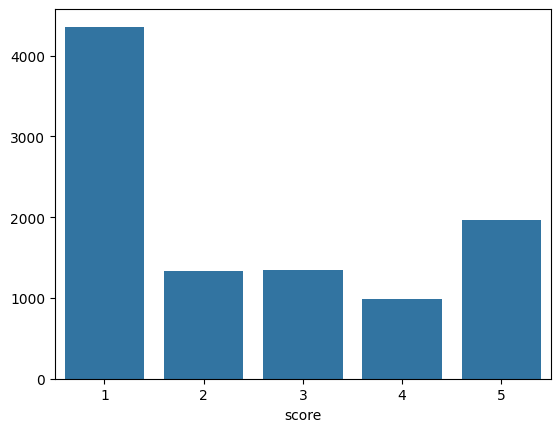

In [8]:
import seaborn as sns
result = data.groupby(['score']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

<Axes: xlabel='sentiment'>

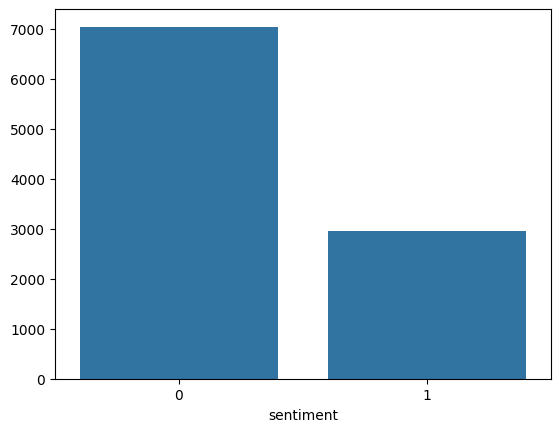

In [9]:
import seaborn as sns
result = data.groupby(['sentiment']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

Text(0.5, 1.0, 'Distribution of sentiment')

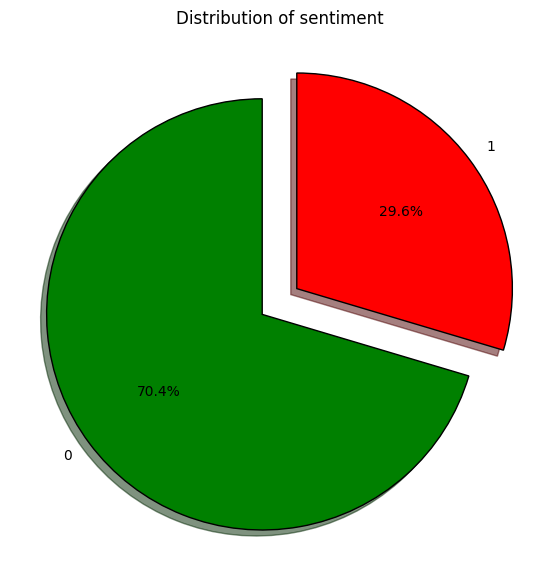

In [11]:
#pie chart to show percentage distribution of polarity
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
colors = ('green','red')
wp={'linewidth':1, 'edgecolor': 'black'}
tags=data['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiment')

### Wordcloud

wordcloud Positif

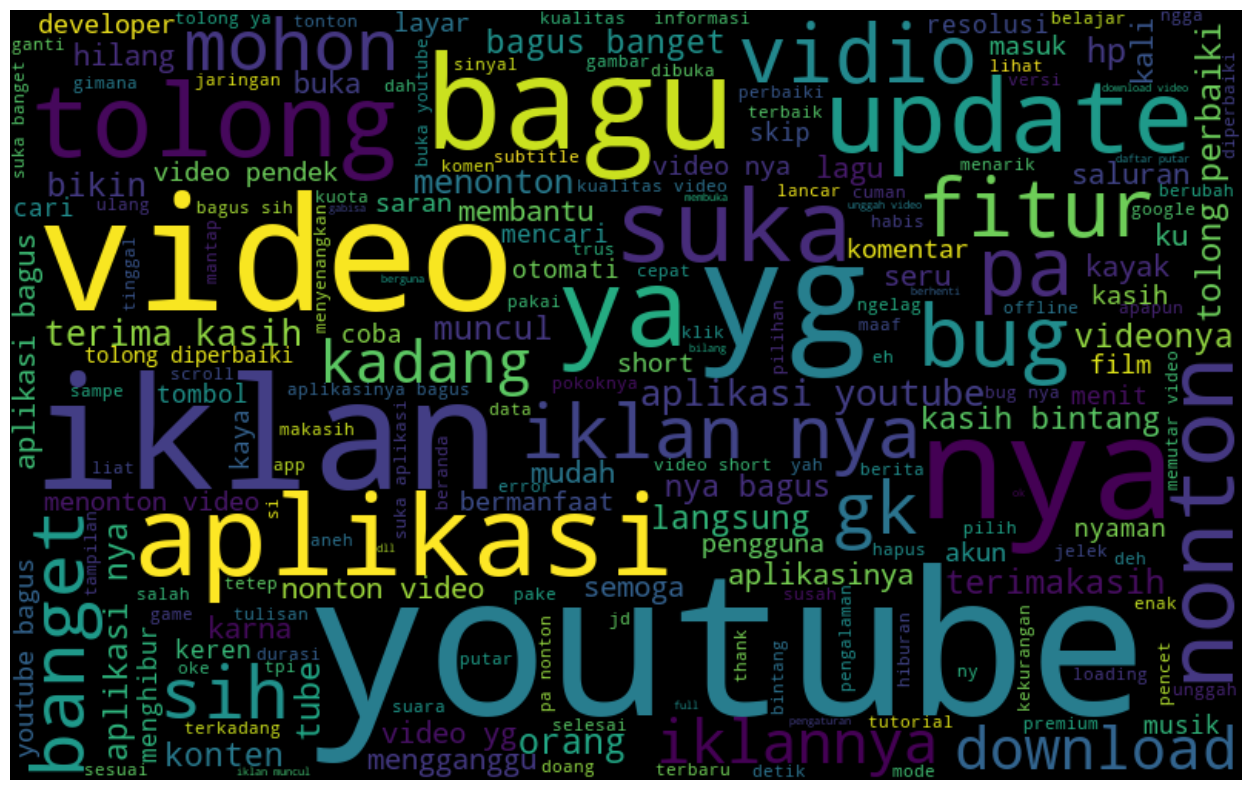

In [41]:
data_p=data[data['sentiment']==2]
all_words_lem = ' '.join([word for word in data_p['clean_content']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Wordcloud Netral

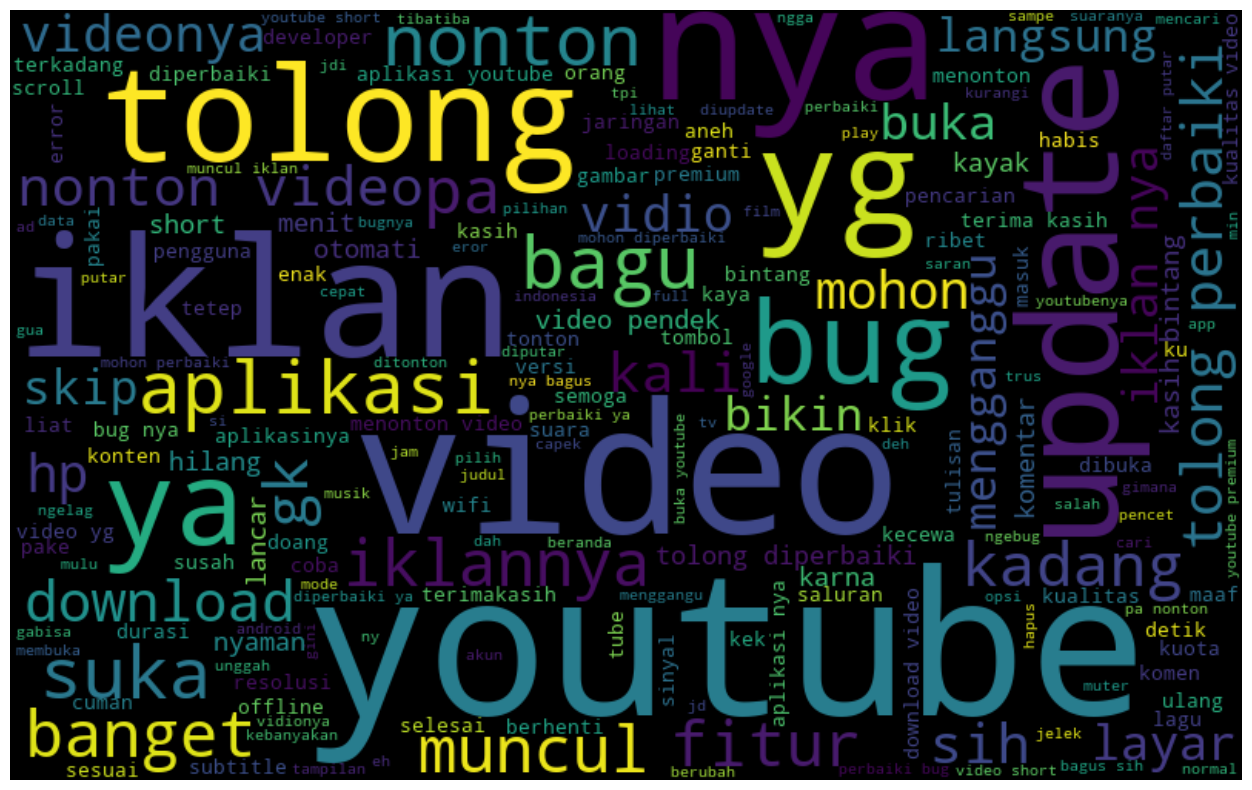

In [42]:
data_p=data[data['sentiment']==1]
all_words_lem = ' '.join([word for word in data_p['clean_content']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Wordcloud Negatif

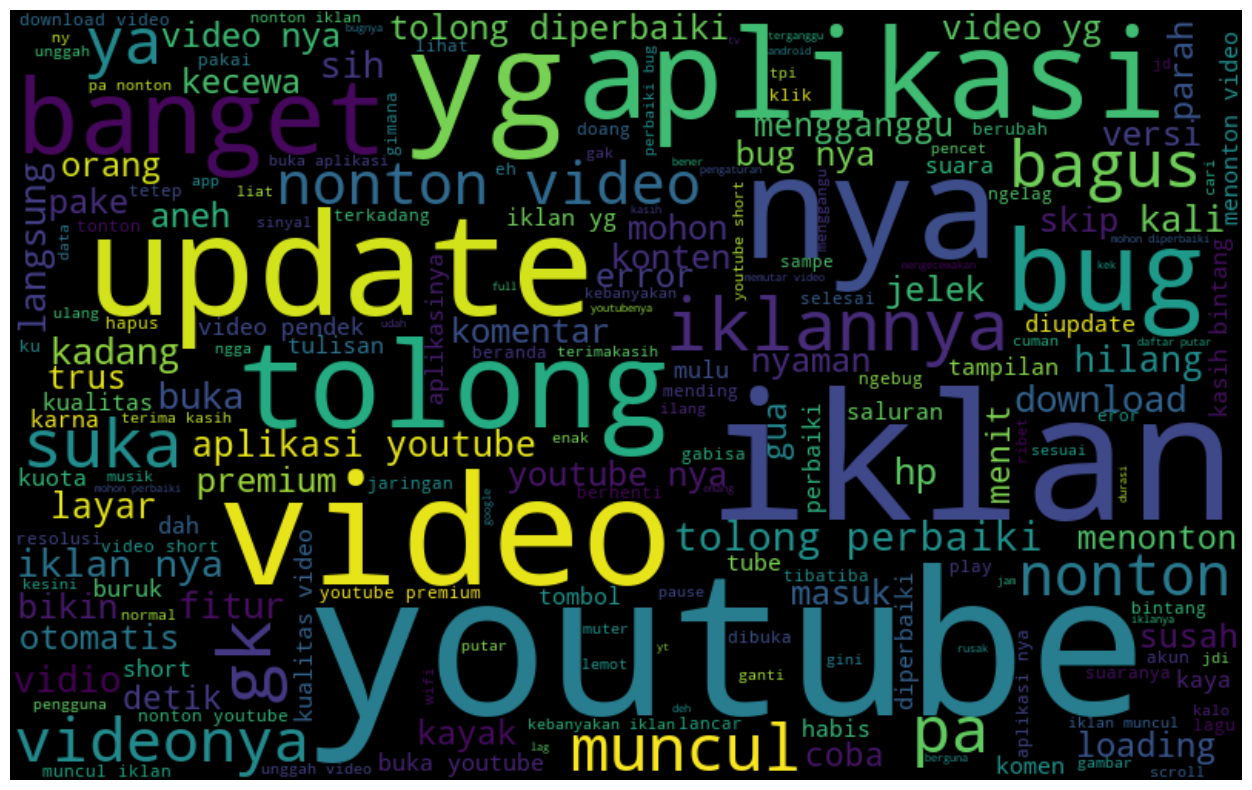

In [43]:
data_p=data[data['sentiment']==0]
all_words_lem = ' '.join([word for word in data_p['clean_content']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [44]:
data.to_csv(r'D:\prooject TA\data streaming\data_streaming.csv')

In [32]:
data.to_csv(r'D:\prooject TA\data streaming\data_streaming_new.csv', index=False)

In [ ]:
data = pd.read_csv(r'D:\prooject TA\data streaming\data_streaming_new.csv')

In [12]:
data

,Unnamed: 0,content,score,clean_content,sentiment
0,0,Tolong buat admin YouTube iklannya ditambahkan...,1,tolong admin youtube iklannya iklan video dura...,0
1,1,"Semakin update malah makin rusak, saat layar p...",1,update rusak layar posisi landscape mengubah p...,0
2,2,"YouTube jadi sering error, semenjak update ter...",1,youtube error semenjak update terbaru contoh b...,0
3,3,"Barusan update lagi, langsung tes. Masih mirip...",1,barusan update langsung te bug terburuk update...,0
4,4,"sumpah update-an YouTube sekarang JELEK PARAH,...",1,sumpah updatean youtube jelek parah video ngam...,0
...,...,...,...,...,...
9995,9995,"Setelah di update dan beralih ke yt premium, s...",1,update beralih youtube premium subtitle beruba...,0
9996,9996,Terus gimana untuk bug komentarnya!!? Saya mau...,1,gimana bug komentarnya scroll komentarnya gk t...,0
9997,9997,Kini youtube terlalu fokus untuk mengumpulkank...,1,youtube fokus mengumpulkankan uang lupa penggu...,0
9998,9998,Hallo saya punya keluhan nih kenapa ya notifik...,2,hallo keluhan ya notifikasi youtube muncul sal...,0


In [13]:
data['clean_content'] = data['clean_content'].astype('str')
data['clean_content'] = data['clean_content'].astype(pd.StringDtype())
data.dtypes

Unnamed: 0                int64
content                  object
score                     int64
clean_content    string[python]
sentiment                 int64
dtype: object

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, GlobalMaxPool1D # Import MaxPooling1D and Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# percobaan 

### split data

In [15]:
#  Memisahkan dataset asli menjadi data latih dan validasi (85%) dan data uji (15%).
X_train_val, X_test, y_train_val, y_test = train_test_split(data.clean_content,
                                                        data.sentiment,
                                                        test_size=0.15,
                                                        random_state=42,
                                                        stratify=data.sentiment)
                                                    # data.sentiment,
                                                    # test_size=0.15,
                                                    # random_state=20,
                                                    # stratify=data.sentiment)

# Memisahkan data latih dan validasi (80%) menjadi data latih (90% dari 85%) dan data validasi (10% dari 85%).
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Training Size : ', X_train.shape)
print('Validation Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Training Size :  (7650,)
Validation Size   :  (850,)
Test Size  :  (1500,)


### model building

### text vectorization

In [16]:
max_len = max([len(i.split(" ")) for i in X_train])  # Menghitung panjang maksimal dari setiap teks dalam data pelatihan
max_len  # Menampilkan nilai max_len

63

In [17]:
from tensorflow.keras.layers import TextVectorization
# Define the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=5000,                   # Jumlah maksimum kata dalam kosakata
    output_mode='int',                 # Output berupa indeks bilangan bulat yang mewakili token
    output_sequence_length=100,        # Pad atau potong urutan teks agar memiliki panjang 100
    standardize='lower_and_strip_punctuation',  # Mengubah teks menjadi huruf kecil dan menghapus tanda baca
    split='whitespace'                 # Memisahkan teks berdasarkan spasi
)

# Menyesuaikan layer TextVectorization dengan data pelatihan
# Tahap ini mempelajari kosakata dari data pelatihan
text_vectorization.adapt(X_train)

# Mendapatkan ukuran kosakata (jumlah kata unik yang ditemukan dalam data pelatihan)
vocab_size = len(text_vectorization.get_vocabulary())

# Menerapkan TextVectorization untuk mengubah data teks menjadi urutan bilangan bulat
X_train_vec = text_vectorization(X_train)  # Mengubah data pelatihan
X_val_vec = text_vectorization(X_val)      # Mengubah data validasi
X_test_vec = text_vectorization(X_test)    # Mengubah data pengujian

# Mencetak bentuk data yang telah diproses untuk memverifikasi dimensi
print(X_train_vec.shape)  # Bentuk data pelatihan setelah vektorisasi
print(X_val_vec.shape)    # Bentuk data validasi setelah vektorisasi
print(X_test_vec.shape)   # Bentuk data pengujian setelah vektorisasi

(7650, 100)
(850, 100)
(1500, 100)


In [18]:
## Contoh dokumen
print('Contoh dokumen')
print(data.clean_content[1])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([data.clean_content[0]]))
print('Vector size : ', text_vectorization([data.clean_content[0]]).shape)

Contoh dokumen
update rusak layar posisi landscape mengubah posisi berdiri berhenti videonya play ngebug play login ulang menggangu serius nya sengaja layarnya geser langsung ngebug tolong min fixdi perbaiki

Hasil Text Vectorization
tf.Tensor(
[[   6  427    3   20    4    2  263   43 1129 2778 1018   56  158  130
     2   20    6  274    3   20  295 2594 1707   67   56   76   23    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]], shape=(1, 100), dtype=int64)
Vector size :  (1, 100)


In [19]:
# Melihat 20 Token Teratas (Diurutkan berdasarkan Frekuensi Kemunculan Tertinggi)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'video',
 'youtube',
 'iklan',
 'nya',
 'tolong',
 'yg',
 'aplikasi',
 'update',
 'nonton',
 'bagus',
 'bug',
 'ya',
 'banget',
 'perbaiki',
 'pa',
 'suka',
 'muncul',
 'buka']

### Oversampling

Oversampling menggunakan SMOTE ini bertujuan untuk menyeimbangkan kelas pada data latih. Karena sebelumnya diketahui bahwa data kelas 'sentiment' tidak seimbang dibandingkan kelas yang lain setelah dilakukan preprocessing.

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your training data and transform
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# mengubah target ke One-Hot Encoding
y_train_ohe_resampled = to_categorical(y_train_resampled_encoded)
y_val_ohe = to_categorical(y_val_encoded)
y_test_ohe = to_categorical(y_test_encoded)

print('Resampled Train Size : ', X_train_resampled.shape)
print('Resampled Train Target Size : ', y_train_ohe_resampled.shape)
print(y_val_ohe.shape)
print(y_test_ohe.shape)

Resampled Train Size :  (10770, 100)
Resampled Train Target Size :  (10770, 2)
(850, 2)
(1500, 2)


### Model Bidirectional LSTM

In [22]:
# Set seed untuk reproducibility
tf.random.set_seed(123)

# hyperparameter
regularizer = tf.keras.regularizers.l2(0.05) # untuk mengendalikan overfitting
learning_rate = 0.0001
#vocab_size = vocab_size
num_classes = 2
output_dim = 100

# Define Model with LSTM
model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False, kernel_regularizer=regularizer)),
    tf.keras.layers.Dropout(0.5),  # Reduced dropout rate
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),  # Added batch normalization
    tf.keras.layers.Dropout(0.5),  # Reduced dropout rate
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_rnn.build(input_shape=(None, 100))
# Compile Model
model_rnn.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
model_rnn.summary()              


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,186 (2.04 MB)

 Trainable params: 535,154 (2.04 MB)

 Non-trainable params: 32 (128.00 B)

In [23]:
regularizer = tf.keras.regularizers.l2(0.05) # untuk mengendalikan overfitting
embed_dim = 300
learning_rate = 0.0001

model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=100))
model_cnn.add(tf.keras.layers.Conv1D(32, 4, activation='relu', kernel_regularizer=regularizer, padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Dropout untuk mencegah overfitting
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Dropout(0.5))  

model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(16, activation='relu'))  # Dense dengan L2 regularization
model_cnn.add(tf.keras.layers.Dropout(0.5))

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomTranslation(0.2, 0.2),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.GaussianNoise(0.1)
# ])

# model_cnn.add(tf.keras.layers.Conv1D(32,4,activation='relu', padding='same'))
# model_cnn.add(tf.keras.layers.MaxPooling1D(2))
# model_cnn.add(tf.keras.layers.Dropout(0.1))
# model_cnn.add(tf.keras.layers.Conv1D(32,4, activation='relu', padding='same'))
# model_cnn.add(tf.keras.layers.MaxPooling1D(2))
# model_cnn.add(tf.keras.layers.Dropout(0.1))
# model_cnn.add(tf.keras.layers.Conv1D(32,4,activation='relu', padding='same'))
# model_cnn.add(tf.keras.layers.MaxPooling1D(2))
# model_cnn.add(tf.keras.layers.Flatten())
# model_cnn.add(tf.keras.layers.Dropout(0.1))
# model_cnn.add(tf.keras.layers.Dense(32, activation='relu'))

model_cnn.build(input_shape=(None, 100))
model_cnn.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 300)       │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 100, 32)        │        38,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        25,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,564,210 (5.97 MB)

 Trainable params: 1,564,146 (5.97 MB)

 Non-trainable params: 64 (256.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

num_epochs = 100
batch_size = 32

# # Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print('Training Model with RNN', '\n')
history_rnn = model_rnn.fit(
    X_train_resampled,
    y_train_ohe_resampled,
    epochs=num_epochs,
    validation_data=(X_val_vec, y_val_ohe),
    batch_size=batch_size,
    callbacks = [early_stopping])
print()
print('Training Model With CNN')
history_cnn = model_cnn.fit(
    X_train_resampled,
    y_train_ohe_resampled,
    epochs=num_epochs,
    validation_data=(X_val_vec, y_val_ohe),
    batch_size=batch_size,
    callbacks = [early_stopping])

Training Model with RNN 

Epoch 1/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5238 - loss: 11.8678 - val_accuracy: 0.5094 - val_loss: 8.0476
Epoch 2/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5724 - loss: 7.1242 - val_accuracy: 0.6059 - val_loss: 4.8526
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6227 - loss: 4.3047 - val_accuracy: 0.6682 - val_loss: 2.9537
Epoch 4/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6656 - loss: 2.6597 - val_accuracy: 0.6565 - val_loss: 1.9160
Epoch 5/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7012 - loss: 1.7247 - val_accuracy: 0.6494 - val_loss: 1.3480
Epoch 6/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7246 - loss: 1.2034 - val_accuracy: 0.6576 - val_loss: 1.0363
Epoch 7/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7438 - loss: 0.9189 - val_accuracy: 0.6835 - val_loss: 0.8456
Epoch 8/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accura

In [41]:
# evaluasi model pada data testing
loss, accuracy = model_rnn.evaluate(X_val_vec, y_val_ohe)
print("Akurasi model RNN:", accuracy)
print("Test Loss:", loss, "\n")

loss, accuracy = model_cnn.evaluate(X_val_vec, y_val_ohe)
print("Akurasi model CNN:", accuracy)
print("Test Loss", loss)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6292 - loss: 0.9434
Akurasi model RNN: 0.6166666746139526
Test Loss: 0.9620485305786133 

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5986 - loss: 0.5490
Akurasi model CNN: 0.5799999833106995
Test Loss 0.562837541103363


In [25]:
# evaluasi model pada data testing
loss, accuracy = model_rnn.evaluate(X_val_vec, y_val_ohe)
print("Akurasi model RNN:", accuracy)
print("Test Loss:", loss, "\n")

loss, accuracy = model_cnn.evaluate(X_val_vec, y_val_ohe)
print("Akurasi model CNN:", accuracy)
print("Test Loss", loss)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6912 - loss: 0.6883
Akurasi model RNN: 0.6752941012382507
Test Loss: 0.7207554578781128 

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.6180
Akurasi model CNN: 0.6905882358551025
Test Loss 0.6306579113006592


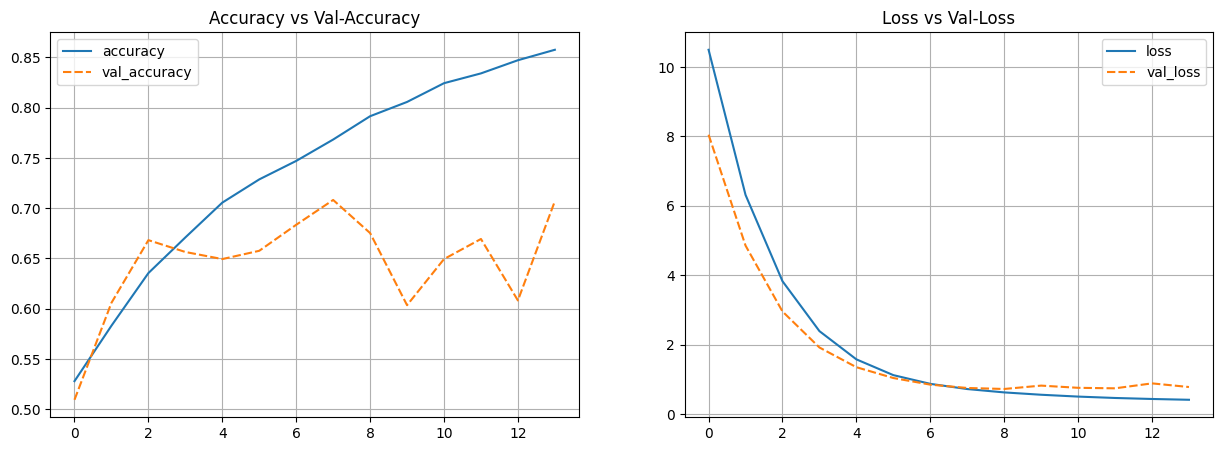

In [26]:
# Plot Training Results

history_lstm_df = pd.DataFrame(history_rnn.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_lstm_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.subplot(1, 2, 2)
sns.lineplot(data=history_lstm_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

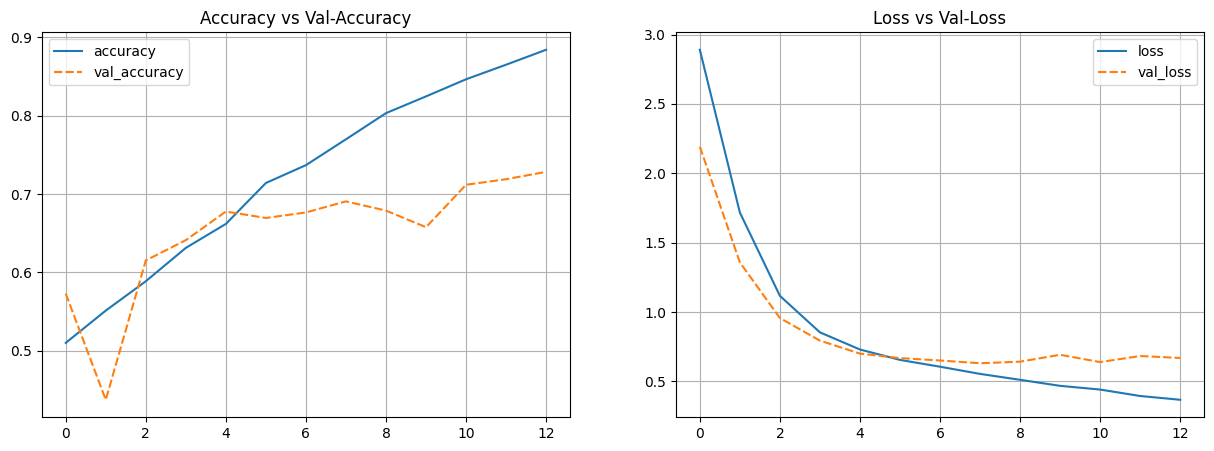

In [27]:
# Plot Training Results

history_lstm_df = pd.DataFrame(history_cnn.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_lstm_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.subplot(1, 2, 2)
sns.lineplot(data=history_lstm_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [28]:
# Prediksi kelas
y_pred = model_rnn.predict(X_test_vec)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_ohe, axis=1)

# Definisikan nama kelas sesuai dengan label target
target_names = [ 'negatif', 'positif']

report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)

print(report)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

     negatif       0.84      0.71      0.77      1056
     positif       0.49      0.68      0.57       444

    accuracy                           0.70      1500
   macro avg       0.67      0.69      0.67      1500
weighted avg       0.74      0.70      0.71      1500



In [29]:
# Prediksi kelas
y_pred = model_cnn.predict(X_test_vec)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_ohe, axis=1)

# Definisikan nama kelas sesuai dengan label target
target_names = [ 'negatif', 'positif']

report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)

print(report)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

     negatif       0.83      0.75      0.79      1056
     positif       0.52      0.64      0.57       444

    accuracy                           0.72      1500
   macro avg       0.67      0.69      0.68      1500
weighted avg       0.74      0.72      0.72      1500



47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


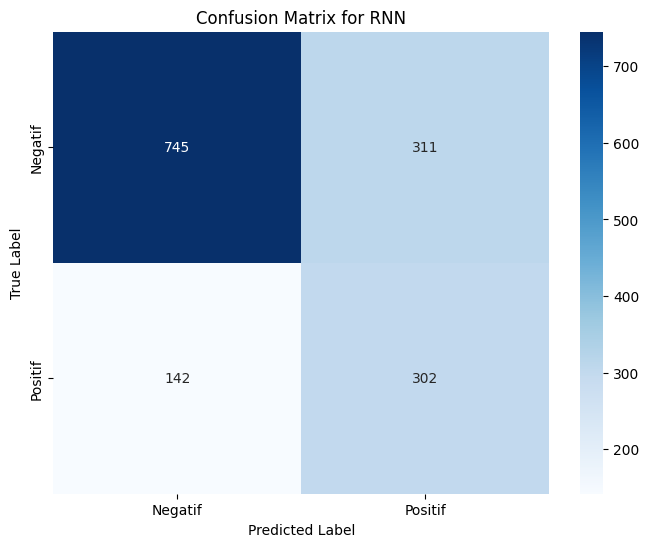

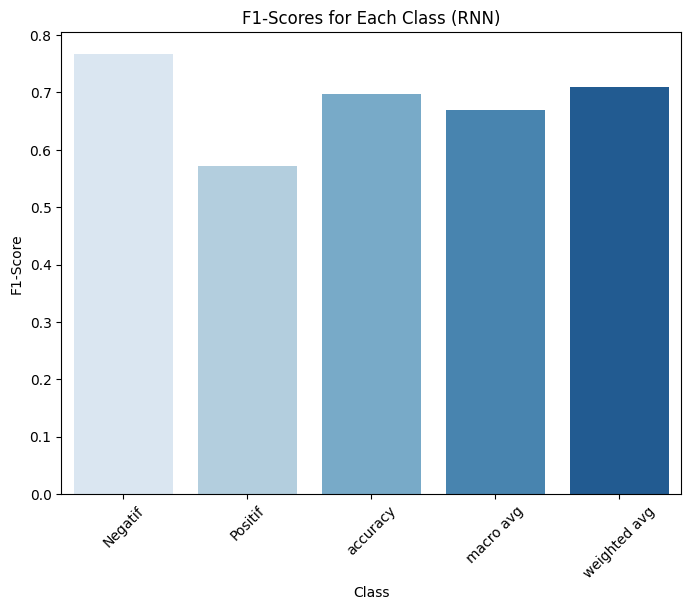

In [30]:
# Assuming RNN model predictions are the output of your RNN model
rnn_predictions_probabilities = model_rnn.predict(X_test_vec)

# Convert probabilities to binary/multiclass labels
rnn_predictions = np.argmax(rnn_predictions_probabilities, axis=1)

# Generate confusion matrix for RNN
conf_matrix_rnn = confusion_matrix(y_test, rnn_predictions)

# Plot confusion matrix for RNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix for RNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report for RNN
report_rnn = classification_report(y_test, rnn_predictions, target_names=['Negatif', 'Positif'], output_dict=True)

# Convert report to DataFrame for easier visualization (RNN)
report_df_rnn = pd.DataFrame(report_rnn).transpose()

# Plot F1-score for RNN
plt.figure(figsize=(8, 6))
sns.barplot(x=report_df_rnn.index, y=report_df_rnn['f1-score'], palette="Blues")
plt.title("F1-Scores for Each Class (RNN)")
plt.xlabel("Class")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


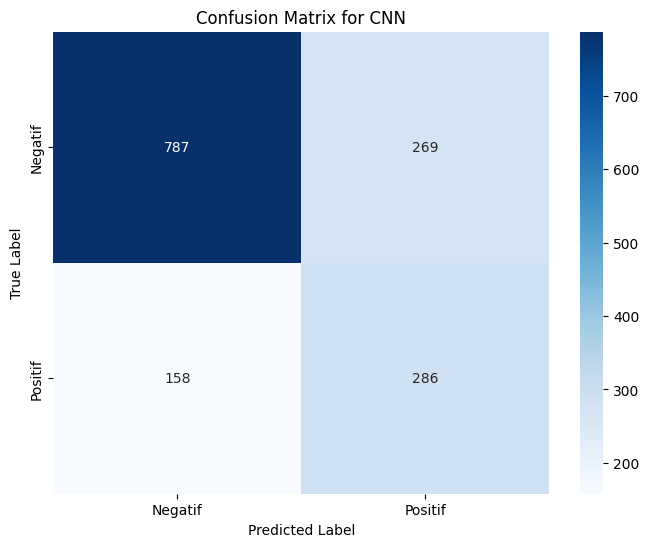

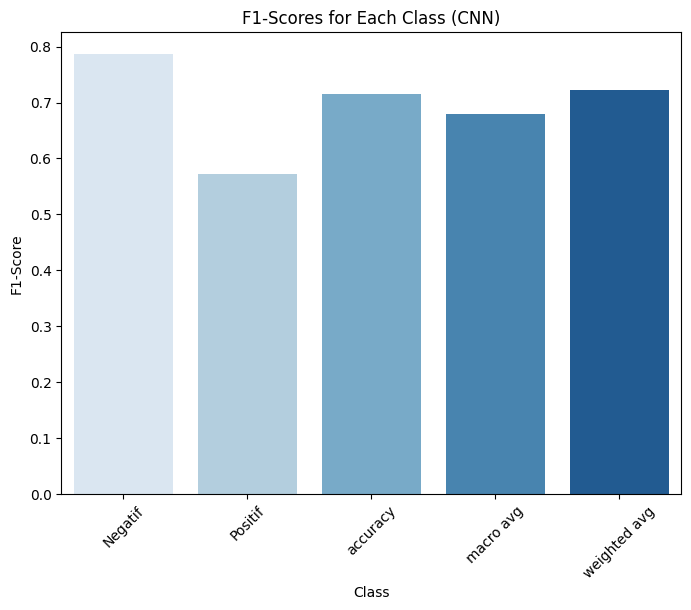

In [31]:
# Assuming CNN model predictions are the output of your CNN model
cnn_predictions_probabilities = model_cnn.predict(X_test_vec)

# Convert probabilities to binary/multiclass labels
cnn_predictions = np.argmax(cnn_predictions_probabilities, axis=1)

# Generate confusion matrix for CNN
conf_matrix_cnn = confusion_matrix(y_test, cnn_predictions)

# Plot confusion matrix for CNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix for CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report for CNN
report_cnn = classification_report(y_test, cnn_predictions, target_names=['Negatif', 'Positif'], output_dict=True)

# Convert report to DataFrame for easier visualization (CNN)
report_df_cnn = pd.DataFrame(report_cnn).transpose()

# Plot F1-score for CNN
plt.figure(figsize=(8, 6))
sns.barplot(x=report_df_cnn.index, y=report_df_cnn['f1-score'], palette="Blues")
plt.title("F1-Scores for Each Class (CNN)")
plt.xlabel("Class")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()


In [ ]:
new_review = ["Aplikasi ini sangat membantu"]
sequence = tokenizer.texts_to_sequences(new_review)
padded_sequence = pad_sequences(sequence, maxlen=maxlen)
prediction = model_rnn.predict(padded_sequence)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.20096949 0.28730854 0.73999107]]


In [ ]:
# Mengimpor modul yang diperlukan
import io
import base64
import urllib
import nltk
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import ssl
from flask import Flask, request, render_template
from nltk.sentiment import SentimentIntensityAnalyzer
from google_play_scraper import app, Sort, reviews_all

matplotlib.use('agg')

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Mendownload lexicon 'vader' yang digunakan untuk analisis sentimen
nltk.download('vader_lexicon')

# Membuat instance Flask
app = Flask(__name__)

# Membuat instance SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Mendefinisikan route '/' untuk metode GET
@app.route('/', methods=['GET'])
def home():
    # Merender template 'index.html' saat route '/' diakses
    return render_template('index.html')

# Mendefinisikan route '/analyze' untuk metode POST
@app.route('/analyze', methods=['POST'])
def analyze():
    game_id = request.form.get('game_id')

    # Mengambil review dari aplikasi 'com.miHoYo.GenshinImpact' menggunakan fungsi reviews_all
    game_reviews = reviews_all(
        game_id,
        lang='id',
        country='id',
        sort=Sort.MOST_RELEVANT,
        count=2000,
        filter_score_with= None
    )

    # Membuat list kosong untuk menyimpan review yang telah diproses
    reviews = []
    for review in game_reviews:
        # Membersihkan konten review dan mengubahnya menjadi huruf kecil
        clean_content = review['content'].replace(r'[^\w\s]', '')
        clean_content = clean_content.lower()

        # Menghitung skor sentimen dari konten review yang telah dibersihkan
        polarity_scores = sia.polarity_scores(clean_content)

        # Menentukan sentimen berdasarkan skor sentimen
        sentiment = 'positif' if polarity_scores['compound'] > 0 else ('negatif' if polarity_scores['compound'] < 0 else 'netral')

        # Menambahkan review dan sentimen ke dalam list reviews
        reviews.append({
            'content': review['content'],
            'sentiment': sentiment
        })

    # Menghitung jumlah review untuk setiap sentimen
    sentiment_counts = pd.DataFrame(reviews)['sentiment'].value_counts()

    # Membuat plot pie
    plt.figure(figsize=(6,6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')

    # Menyimpan plot sebagai gambar PNG dalam buffer
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)

    # Mengubah gambar PNG menjadi data URL
    plot_url = urllib.parse.quote(base64.b64encode(img.read()).decode())

    # Merender template 'index.html' dengan variabel reviews
    return render_template('index.html', reviews=reviews, plot_url=plot_url)

# Menjalankan aplikasi Flask dalam mode debug
if __name__ == "__main__":
 app.run(debug=True)